In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/SuperStore.csv")   # Step 1: Load Data

In [7]:
# Step 2: View Data
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [9]:
# Step 3: Clean Data
df.dropna(inplace=True)

In [10]:
# Step 4: Total Sales by Category
category_sales = df.groupby("Category")["Sales"].sum()
print(category_sales)

Category
Furniture          723538.4757
Office Supplies    703212.8240
Technology         825856.1130
Name: Sales, dtype: float64


In [11]:
# Step 5: Average Order Value by Region
region_avg_order = df.groupby("Region")["Sales"].mean()
print(region_avg_order)

Region
Central    216.357889
East       238.136033
South      243.524067
West       226.184613
Name: Sales, dtype: float64


In [12]:
# Step 6: Highest Selling Product
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [14]:
# Convert Order Date column correctly
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Group by month and sum sales
monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
print(monthly_sales)


Order Date
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     70129.2995
2016-12     74543.6012
2017-01     16870.1810
2017-02     22978.8150
2017-03     51165.0590
2017-04     37385.0170
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     42839.2940
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040


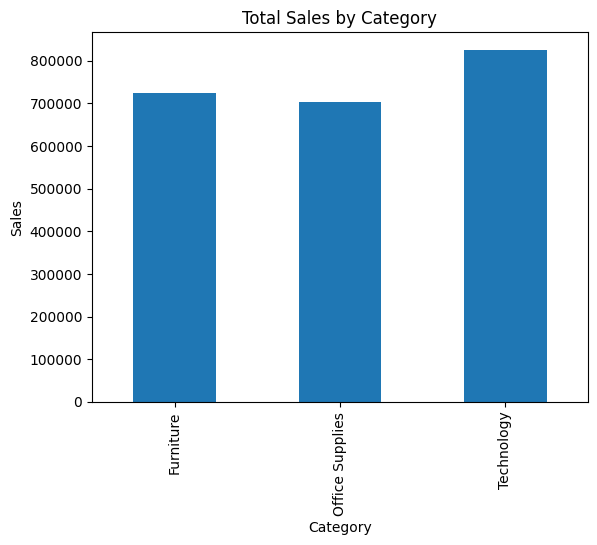

In [15]:
# Step 8: Bar Chart
category_sales.plot(kind='bar', title="Total Sales by Category")
plt.ylabel("Sales")
plt.show()

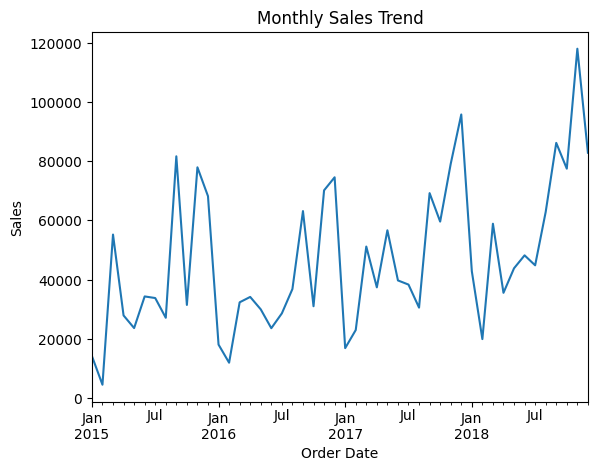

In [16]:
# Step 9: Line Chart
monthly_sales.plot(kind='line', title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

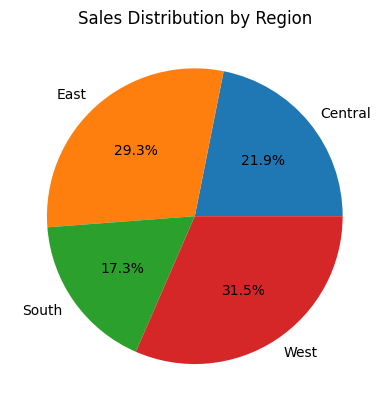

In [17]:
# Step 10: Pie Chart
region_sales = df.groupby("Region")["Sales"].sum()
region_sales.plot(kind="pie", autopct="%1.1f%%", title="Sales Distribution by Region")
plt.ylabel("")
plt.show()